# Assignment 2

In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Problem 1


# a)

Pr(Y = 1 | X, Z) = $Z(\frac{1}{1+exp(-(β_0 + β_1X + β_2Z))})$

In [4]:
#X = 30, Z = 1
P1 = 1/(1+ math.exp(-(-3.50+ 0.18*30 + 1.24*1)))
print(P1)


0.9585128806983042


# b)

## (a)


$Pr(Y = 1 | X, Z) = Z(\frac{1}{1+exp(-(α_0 + α_1X))}) + (1-Z)(\frac{1}{1+exp(-(β_0 + β_1X))})$


When Z = 1 (use Python), $Pr(Y = 1 | X, Z) = \frac{1}{1+exp(-(α_0 + α_1X))}$

When Z = 0 (use R), $Pr(Y = 1 | X, Z) = \frac{1}{1+exp(-(β_0 + β_1X))}$

This model uses different coefficients to predict different situations.


## (b)

Firstly, I will divide the data into two subsets: Python & R.
Then I will train the two models above respectively, using these 2 subsets.

## (c)

In [5]:
# Z = 1
P2 = 1/(1+np.exp(-(-4.02+0.24*30)))
P2

0.960074666047186

## (d)

In [6]:
py_pred_a = P1
r_pred_a = 1/(1+ math.exp(-(-3.50+ 0.18*30 + 1.24*0)))
py_pred_b = P2
r_pred_b = 1 / (1 + np.exp(-(-2.85 + 0.15 * 30)))
py_actual = 30 / 50
r_actual = 21 / 40
deviate_py_a = (py_pred_a - py_actual) / py_actual
deviate_py_b = (py_pred_b - py_actual) / py_actual
deviate_r_a = (r_pred_a - r_actual) / r_actual
deviate_r_b = (r_pred_b - r_actual) / r_actual

deviate_py_a,deviate_py_b,deviate_r_a,deviate_r_b

(0.5975214678305071,
 0.6001244434119768,
 0.6569362393085754,
 0.5978877150922185)

0.5975214678305071 < 0.6001244434119768,

0.6569362393085754 > 0.5978877150922185

Model a predicts Python group better than Model b, while Model b predicts R group better.

Generally, Model b predicts better than Model a, so I expect the model from part (b) to make more accurate probability predictions in future semesters.

## (e)

In [7]:
py_pred_a = P1
r_pred_a = 1/(1+ math.exp(-(-3.50+ 0.18*30 + 1.24*0)))
py_pred_b = P2
r_pred_b = 1 / (1 + np.exp(-(-2.85 + 0.15 * 30)))
py_actual_1 = 8 / 10
r_actual_1 = 4 / 5
deviate_py_a1 = (py_pred_a - py_actual_1) / py_actual_1
deviate_py_b1 = (py_pred_b - py_actual_1) / py_actual_1
deviate_r_a1 = (r_pred_a - r_actual_1) / r_actual_1
deviate_r_b1 = (r_pred_b - r_actual_1) / r_actual_1

deviate_py_a1,deviate_py_b1,deviate_r_a1,deviate_r_b1

(0.1981411008728802,
 0.2000933325589825,
 0.08736440704625259,
 0.04861381302926834)

0.1981411008728802 < 0.2000933325589825

0.08736440704625259 > 0.04861381302926834

Model a predicts Python group better than Model b, while Model b predicts R group better.

Generally, Model b predicts better than Model a, so I expect the model from part (b) to make more accurate probability predictions in future semesters.

# Problem 2

It is equally important to keep both FNR and FPR low. 

Pr(Y = 1 | X = x) = p

The loss for FNR = $L_{FN}$ * Pr(Y = 1 | X = x) = $L_{FN}$ * P
The loss for FPR = $L_{FP}$ * Pr(Y = 0 | X = x) = $L_{FP}$ * (1-p)

Let $L_{FN}$ * p = $L_{FP}$ * (1-p),

then p- =  $\frac{L_{FP}}{L_{FN}+L_{FP}}$


# Problem 3

# a)

## i)

In [8]:
import statsmodels.formula.api as smf


In [9]:
fra_train = pd.read_csv('framingham_train.csv')
fra_test = pd.read_csv('framingham_test.csv')

In [10]:
fra_train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,41,Some high school,1,43,0,0,1,0,306,199.0,106.0,38.75,100,75,0
1,0,38,High school/GED,1,15,0,0,0,0,176,110.0,80.0,24.03,100,113,0
2,1,42,High school/GED,1,9,0,0,0,0,205,110.0,73.0,22.40,61,66,0
3,0,42,High school/GED,0,0,0,0,1,0,263,150.0,88.0,23.68,96,78,0
4,0,53,High school/GED,0,0,0,0,1,0,272,146.0,89.0,25.50,73,67,0


In [46]:
logreg1 = smf.logit(formula = "TenYearCHD ~ male + age + education + currentSmoker + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp + diabetes + totChol + sysBP + diaBP + BMI + heartRate + glucose", 
                   data = fra_train).fit()
print(logreg1.summary())

Optimization terminated successfully.
         Current function value: 0.365281
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2542
Method:                           MLE   Df Model:                           17
Date:                Sun, 03 Oct 2021   Pseudo R-squ.:                  0.1331
Time:                        14:26:18   Log-Likelihood:                -935.12
converged:                       True   LL-Null:                       -1078.7
Covariance Type:            nonrobust   LLR p-value:                 5.181e-51
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                 

The fitted logistic regresion model is $y = \frac{1}{1+exp(-0.1053x_1 -0.1025x_2 + 0.0610x_3 + 0.5621x_4 + 0.0689x_5+ 0.1539x_6+0.0155x_7+0.1528x_8 + 0.8209x_9 + 0.2075x_{10} - 0.2975x_{11} + 0.0020x_{12} + 0.0181x_{13} -0.0045x_{14} + 0.0136x_{15}  -0.0046x_{16} + 0.0096x_{17}-9.2740)}$

$y$: TenYearCHD

$x_1$: education[T.High school/GED];
$x_2$: education[T.Some college/vocational school];
$x_3$: education[T.Some high school];

$x_4$: male;
$x_5$: age;
$x_6$: currentSmoker;

$x_7$: cigsPerDay;
$x_8$: BPMeds;
$x_9$: prevalentStroke;

$x_{10}$: prevalentHyp;
$x_{11}$: diabetes;
$x_{12}$: totChol;

$x_{13}$: sysBP;
$x_{14}$: diaBP; 
$x_{15}$: BMI; 

$x_{16}$: heartRate;
$x_{17}$: glucose.


## ii)

The most important risk factors are male, age, cigsPerDay, sysBP, glucose. 

The P value for these variables are not larger than 0.05, so they have significant effects on TenYearCHD.

The coeffiecient for 'male' is 0.5621, which means male are more likely to get CHD within the next ten years than female.


## iii)

From the decision tree, the expected cost with prescribed medication is 775,000 x 0.15p + 75,000 x (1-(0.15p)) and the expected cost with no prescribed medication is 700,000 x p. The breakeven point is 0.126. 

When p > 0.126, the expected cost with prescribed medication is lower than that with no prescribed medication.

So p-= 0.126

Prescribe medication: p > 0.126

Not prescribe medication: p < 0.126

## iv)


In [48]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
y_test = fra_test['TenYearCHD']
y_prob = logreg1.predict(fra_test)
y_pred = pd.Series([1 if x > 15/119 else 0 for x in y_prob], index=y_prob.index)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[569 354]
 [ 56 119]]


In [59]:
accuracy = (569 +119)/(569+354+56+119)
TPR = 119/(56+119)
FPR = 354/(569+354)
round(accuracy,4), TPR, round(FPR,4)

(0.6266, 0.68, 0.3835)

accuracy = (true possitive + true negative) / (all the predictions) = 0.6266

Accuracy means among all the predictions made by this logistic regression model, 62.66% of are the same with the actual numbers. 

TPR = true possitive / all possitive = true possitive / (true possitive + false negative) = 0.68

TPR means 68% of possitive results can be predicted correctly and the others are predicted the false negative (should be possitive but predicted negative by the model).

FPR = false possitive / all negative = false possitive / (false possitive + true negative) = 0.3835

FPR means 38.35% of negative results can be predicted correctly and the others are predicted the false possitive (should be negative but predicted possitive by the model).


## v)

This assumption is not reasonable. After seeing their risks of developing CHD, some people may change their mind. Since the dataset was collected before the option of prescribing the medication was even considered, the actual result should be significantly different from this model.

## vi)

In [65]:
# let p = 0
y_pred_0 = pd.Series([1 if x > 0.99 else 0 for x in y_prob], index=y_prob.index)

cm_0 = confusion_matrix(y_test, y_pred_0)
print ("Confusion Matrix : \n", cm_0) 

Confusion Matrix : 
 [[923   0]
 [175   0]]


In [67]:
accuracy_0 = 923/(923+175)
TPR_0 = 0/(175+0)
FPR_0 = 0/(923+0)
eco_poss_0 = 0.15*0.99 *775000 + (1-0.15*0.99)*75000
eco_fal_0 = 0.99*700000 + (1-0.99)*0
accuracy_0, TPR_0, FPR_0,eco_poss_0,eco_fal_0

(0.8406193078324226, 0.0, 0.0, 178950.0, 693000.0)

Although the accuracy is higher and FPR is 0.0, the TPR is 0.0. So the model cannot predict well the risks of developing CHD.

For those who accept medication, the economic cost per patient is $178950.0.

For those who don't accept medication, the economic cost per patient is $693000.0.

## vii)

In [70]:
P_5 = 1/(1+math.exp(-0.1053*0 -0.1025*1 + 0.0610*0 + 0.5621*0 + 0.0689*45+ 0.1539*1+0.0155*9+0.1528*1 + 0.8209*1 + 0.2075*0 - 0.2975*1 + 0.0020*220 + 0.0181*140 -0.0045*100 + 0.0136*33 -0.0046*69 + 0.0096*74-9.2740))
P_5 



0.8744180449640621

In [71]:
P_5 > 15/119

True

The physician should prescribe the preventive medication for this patient.

# b)

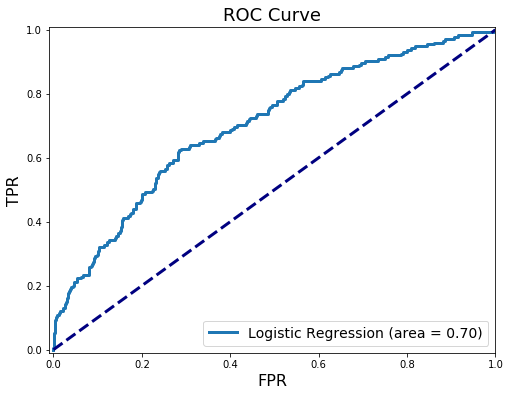

In [72]:
# ROC curves
from sklearn.metrics import roc_curve, auc

y_train = fra_train['TenYearCHD']
x_train = fra_train.drop(['TenYearCHD'],axis = 1)

y_test = fra_test['TenYearCHD']
x_test = fra_test.drop(['TenYearCHD'],axis = 1)

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=14)
plt.show()


AUC measures the model’s discriminative ability. The maximum AUC is 1. 

Given a randomly selected positive observation(patients who are at high risks of developing CHD within 10 years ) and a randomly selected negative observation, AUC is the likelihood that the model would correctly differentiate which is which.

In this case, AUC of our model is 0.7046958675127689, which is the likelihood that the model would assign a higher CHD possibility to patients who are at high risks of developing CHD.

AUC is high, which indicates this model is efficient.

In [74]:
# the area under the curve (AUC)
roc_auc

0.7046958675127689

# c)

The co-payment for medication is C. 

The cost for decreased quality of life if people develop CHD is $500,000.

Let (C + 500,000) * 0.15p- + C * (1-(0.15p-)) = 500,000 * p-

p- = 15/119

Then C = $53571.43

# d)

The patients may not want to know the result of this analysis. So, we should respect their rights to know or not to know the results.

Also, patients provide lots of personal data which should only be used for this analysis. So we should protect their data carefully and prevent data leakage.
